In [3]:
# Network Anomaly Detection using Unsupervised Learning

In [11]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
# Load Dataset
df = pd.read_csv(r"C:\MLProjects\network-anomaly-detection\data\kddcup.data_10_percent", header=None)
df.shape

(494021, 42)

In [13]:
# Preview Data
df.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [14]:
# Understand Data Types
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       494021 non-null  int64  
 1   1       494021 non-null  str    
 2   2       494021 non-null  str    
 3   3       494021 non-null  str    
 4   4       494021 non-null  int64  
 5   5       494021 non-null  int64  
 6   6       494021 non-null  int64  
 7   7       494021 non-null  int64  
 8   8       494021 non-null  int64  
 9   9       494021 non-null  int64  
 10  10      494021 non-null  int64  
 11  11      494021 non-null  int64  
 12  12      494021 non-null  int64  
 13  13      494021 non-null  int64  
 14  14      494021 non-null  int64  
 15  15      494021 non-null  int64  
 16  16      494021 non-null  int64  
 17  17      494021 non-null  int64  
 18  18      494021 non-null  int64  
 19  19      494021 non-null  int64  
 20  20      494021 non-null  int64  
 21  21      494021 non-nu

In [15]:
# Remove Labels
X = df.drop(columns=[41])

In [16]:
# Convert Text → Numbers
X = pd.get_dummies(X)

In [17]:
# Scale Data
from sklearn.preprocessing import StandardScaler

X.columns = X.columns.astype(str)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
# Train Model
from sklearn.ensemble import IsolationForest

model = IsolationForest(contamination=0.05, random_state=42)
model.fit(X_scaled)

,"n_estimators n_estimators: int, default=100The number of base estimators in the ensemble.",100
,"max_samples max_samples: ""auto"", int or float, default=""auto""The number of samples to draw from X to train each base estimator.- If int, then draw `max_samples` samples.- If float, then draw `max_samples * X.shape[0]` samples.- If ""auto"", then `max_samples=min(256, n_samples)`.If max_samples is larger than the number of samples provided,all samples will be used for all trees (no sampling).",'auto'
,"contamination contamination: 'auto' or float, default='auto'The amount of contamination of the data set, i.e. the proportionof outliers in the data set. Used when fitting to define the thresholdon the scores of the samples.- If 'auto', the threshold is determined as in the original paper.- If float, the contamination should be in the range (0, 0.5]... versionchanged:: 0.22 The default value of ``contamination`` changed from 0.1 to ``'auto'``.",0.05
,"max_features max_features: int or float, default=1.0The number of features to draw from X to train each base estimator.- If int, then draw `max_features` features.- If float, then draw `max(1, int(max_features * n_features_in_))` features.Note: using a float number less than 1.0 or integer less than number offeatures will enable feature subsampling and leads to a longer runtime.",1.0
,"bootstrap bootstrap: bool, default=FalseIf True, individual trees are fit on random subsets of the trainingdata sampled with replacement. If False, sampling without replacementis performed.",False
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for :meth:`fit`. ``None`` means 1unless in a :obj:`joblib.parallel_backend` context. ``-1`` means usingall processors. See :term:`Glossary ` for more details.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the pseudo-randomness of the selection of the featureand split values for each branching step and each tree in the forest.Pass an int for reproducible results across multiple function calls.See :term:`Glossary `.",42
,"verbose verbose: int, default=0Controls the verbosity of the tree building process.",0
,"warm_start warm_start: bool, default=FalseWhen set to ``True``, reuse the solution of the previous call to fitand add more estimators to the ensemble, otherwise, just fit a wholenew forest. See :term:`the Glossary `... versionadded:: 0.21",False


In [19]:
# Predict Anomalies
pred = model.predict(X_scaled)

np.sum(pred==-1)

np.int64(24694)

In [20]:
# Percentage of Anomalies
(np.sum(pred==-1)/len(pred))*100

np.float64(4.998572935158626)

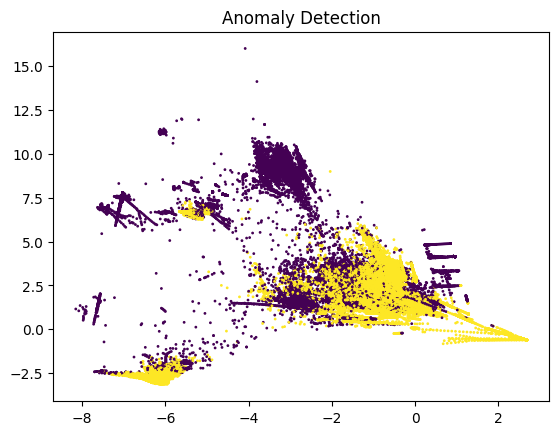

In [22]:
# Visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1], c=pred, s=1)
plt.title("Anomaly Detection")
plt.show()

In [23]:
# Interpretation
# The model detected unusual network patterns by learning normal behavior and flagging deviations.